In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [107]:
try:
    b_report = pd.read_csv('breach_report.csv', encoding='latin5')
    print("Let's go.......................")
except:
    print('No such dataset................')

Let's go.......................


In [108]:
# check first 5 rows
b_report.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/09,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/09,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/09,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/09,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/09,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


In [109]:
# check last 5 rows
b_report.tail()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
1695,Northwest Community Healthcare,IL,Healthcare Provider,540.0,10/7/16,Unauthorized Access/Disclosure,Other Portable Electronic Device,No,NaN
1696,Warren Clinic,OK,Healthcare Provider,2938.0,10/7/16,Hacking/IT Incident,Network Server,No,NaN
1697,Baxter Healthcare,IL,Healthcare Provider,992.0,10/10/16,Unauthorized Access/Disclosure,Email,No,NaN
1698,Peabody Retirement Community,IN,Healthcare Provider,1466.0,10/14/16,Hacking/IT Incident,"Email, Network Server",No,NaN
1699,"Gibson Insurance Agency, Inc.",IN,Business Associate,7242.0,10/14/16,Theft,Laptop,Yes,NaN


In [110]:
# check shape
b_report.shape

(1700, 9)

In [111]:
# check columns
b_report.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [112]:
# More understanding of the dataset -> 

b_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name of Covered Entity            1700 non-null   object 
 1   State                             1689 non-null   object 
 2   Covered Entity Type               1658 non-null   object 
 3   Individuals Affected              1677 non-null   float64
 4   Breach Submission Date            1700 non-null   object 
 5   Type of Breach                    1686 non-null   object 
 6   Location of Breached Information  1689 non-null   object 
 7   Business Associate Present        1700 non-null   object 
 8   Web Description                   1302 non-null   object 
dtypes: float64(1), object(8)
memory usage: 119.7+ KB


In [113]:
# check datatypes of all the columns -> 

b_report.dtypes

Name of Covered Entity               object
State                                object
Covered Entity Type                  object
Individuals Affected                float64
Breach Submission Date               object
Type of Breach                       object
Location of Breached Information     object
Business Associate Present           object
Web Description                      object
dtype: object

In [114]:
# Let's replace the empty strings with NaN values

b_report = b_report.replace(' ', np.nan)

In [115]:
# Let's replace the question marks (?) with NaN values

b_report = b_report.replace('?', np.nan)

In [116]:
# Let's replace the question marks (?) with NaN values

b_report = b_report.replace('?', np.nan)

In [117]:
# Let's replace the question marks (\\N) with NaN values

b_report = b_report.replace('\\N', np.nan)

In [118]:
# check the count of features/ non-null values in each column -> 

b_report.count()

Name of Covered Entity              1700
State                               1689
Covered Entity Type                 1658
Individuals Affected                1677
Breach Submission Date              1700
Type of Breach                      1686
Location of Breached Information    1689
Business Associate Present          1700
Web Description                      696
dtype: int64

In [119]:
# check summary statistics of all numerical columns -> 

b_report.describe().T

,count,mean,std,min,25%,50%,75%,max
Individuals Affected,1677.0,100708.223017,1.979060e+06,500.0,1000.0,2300.0,7526.0,78800000.0


array([[<AxesSubplot:title={'center':'Individuals Affected'}>]],
      dtype=object)

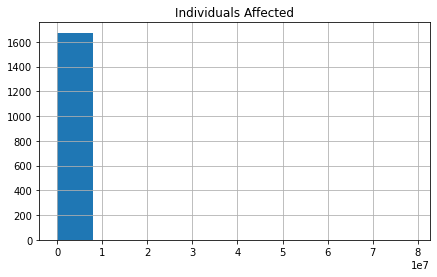

In [120]:
# check hist

b_report.hist(figsize=(7, 4))

In [121]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

b_report.nunique()

Name of Covered Entity              1550
State                                 52
Covered Entity Type                    4
Individuals Affected                1212
Breach Submission Date              1054
Type of Breach                        28
Location of Breached Information      62
Business Associate Present             2
Web Description                      686
dtype: int64

Text(0.5, 1.0, 'Cardinality')

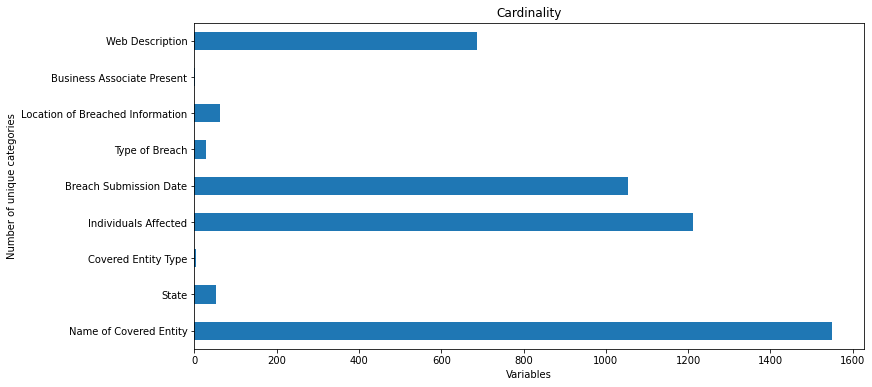

In [122]:
# plot the cardinality:

b_report.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [123]:
# display categorical features/columns -> 

categorical_columns = b_report.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [124]:
# display numerical features/columns -> 

numerical_columns = b_report.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['Individuals Affected'], dtype='object')

In [125]:
# check for duplicate rows in the dataset -> 

b_report.duplicated().sum()

1

In [126]:
# drop duplicated rows
b_report.drop_duplicates(inplace=True)

In [127]:
# check for duplicate rows in the dataset -> 

b_report.duplicated().sum()

0

In [128]:
# check missing values -> 

b_report.isnull().sum()

Name of Covered Entity                 0
State                                 11
Covered Entity Type                   42
Individuals Affected                  23
Breach Submission Date                 0
Type of Breach                        14
Location of Breached Information      11
Business Associate Present             0
Web Description                     1003
dtype: int64

In [129]:
# print names or check all columns which have null values -> 

[val for val in b_report.columns if b_report[val].isnull().sum() > 0]

['State',
 'Covered Entity Type',
 'Individuals Affected',
 'Type of Breach',
 'Location of Breached Information',
 'Web Description']

In [130]:
# print the percentage of missing values -> 

mask = b_report.isnull()

total = mask.sum()

percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',keys=['count_missing', 'percentage_missing (%)'])

missing_data.sort_values(by='percentage_missing (%)', ascending=False,inplace=True)

missing_data

,count_missing,percentage_missing (%)
Web Description,1003,59.034726
Covered Entity Type,42,2.472042
Individuals Affected,23,1.353737
Type of Breach,14,0.824014
State,11,0.647440
Location of Breached Information,11,0.647440
Name of Covered Entity,0,0.000000
Breach Submission Date,0,0.000000
Business Associate Present,0,0.000000


In [131]:
# print the nullable columns -> 

nullable_columns = b_report.columns[mask.any()].tolist()

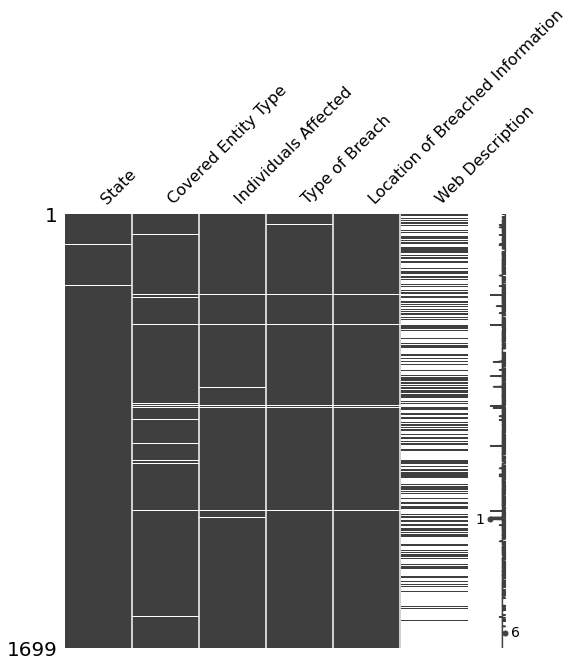

In [132]:
# use `missingno` libraries to plot the matrix and heatmap of nullable columns

msno.matrix(b_report[nullable_columns], figsize=(8,8))

plt.show()

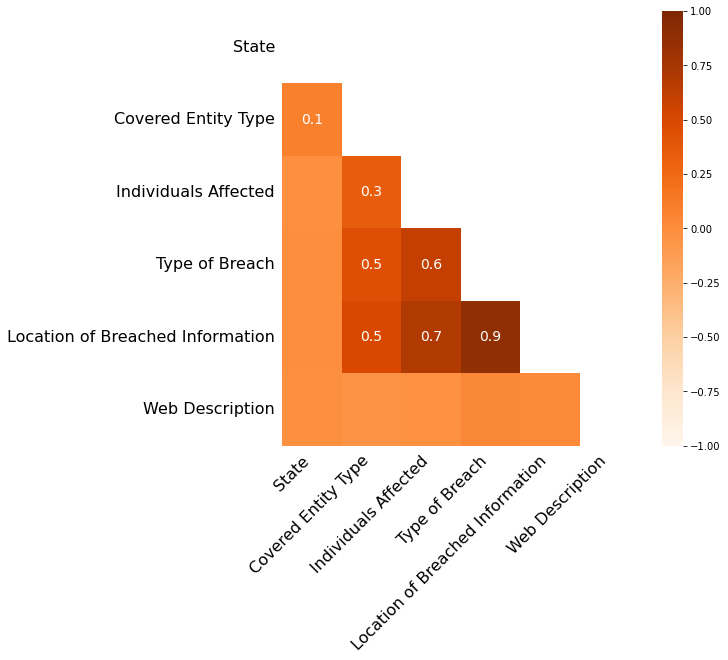

In [133]:
msno.heatmap(b_report[nullable_columns], figsize=(8,8), cmap='Oranges')
plt.show()

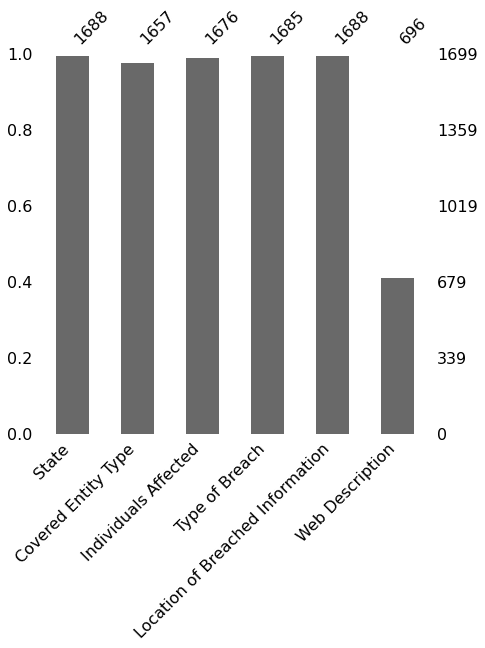

In [134]:
msno.bar(b_report[nullable_columns], figsize=(7,7))
plt.show()

In [135]:
b_report.sample(n=4)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
764,Baylor All Saints Medical Center at Fort Worth,TX,Healthcare Provider,940.0,8/5/13,Unauthorized Access/Disclosure,Other Portable Electronic Device,No,"A former employee the covered entity (CE), Bay..."
1254,"7-Eleven, Inc. Comprehensive Welfare Benefits ...",TX,Health Plan,1688.0,3/25/15,Hacking/IT Incident,Network Server,No,NaN
971,Stoetzel's Planet Chiropractic,IL,Healthcare Provider,1000.0,3/25/14,Theft,"Laptop, Other Portable Electronic Device",No,An unauthorized individual broke into the cove...
1131,"U.S. Health Holdings, Ltd. o/b/o Macomb County...",MI,Health Plan,6302.0,10/1/14,Unauthorized Access/Disclosure,Other,No,NaN


In [136]:
b_report.dropna(axis=0, how='all', inplace=True)

In [137]:
b_report['Location of Breached Information'].fillna(b_report['Location of Breached Information'].mode()[0], inplace=True)
b_report['State'].fillna(b_report['State'].mode()[0], inplace=True)
b_report['Type of Breach'].fillna(b_report['Type of Breach'].mode()[0], inplace=True)
b_report['Covered Entity Type'].fillna(b_report['Covered Entity Type'].mode()[0], inplace=True)
b_report['Web Description'].fillna(b_report['Web Description'].mode()[0], inplace=True)
b_report['Individuals Affected'].fillna((b_report['Individuals Affected'].mean()), inplace=True)

============

`Part 2`

`EDA`

In [138]:
b_report.sample(n=2)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
903,Cook County Health & Hospitals System,IL,Healthcare Provider,22511.0,1/11/14,Other,Email,No,"The covered entity (CE), Cook County Health an..."
1302,Associated Dentists,MN,Healthcare Provider,4725.0,5/18/15,Theft,Laptop,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...


In [151]:
sv = b_report.State.value_counts().reset_index()
sv.rename(columns={'index':'State', 'State':'Count of Breaches per State'}, inplace=True)
sv

,State,Count of Breaches per State
0,CA,211
1,TX,140
2,FL,114
3,NY,104
4,IL,93
5,PA,60
6,IN,57
7,OH,56
8,GA,50
9,NC,44


====================================

In [140]:
b_report.sample(n=3)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
1664,"Man Alive, Inc. and Lane Treatment Center, LLC",MD,Healthcare Provider,860.0,9/8/16,Hacking/IT Incident,"Desktop Computer, Electronic Medical Record",No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...
1331,CVS Health,RI,Healthcare Provider,12914.0,6/26/15,Theft,Desktop Computer,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...
252,NYU School of Medicine Faculty Group Practice,NY,Healthcare Provider,670.0,3/28/11,Theft,Desktop Computer,No,An unencrypted desktop computer that contained...


In [154]:
# types of breaches that have Occurred
tpb = b_report['Type of Breach'].value_counts().reset_index()
tpb.rename(columns={'index':'Type of Breach', 'Type of Breach':'Count of Types of Breaches that have Occurred'}, inplace=True)
tpb

,Type of Breach,Count of Types of Breaches that have Occurred
0,Theft,738
1,Unauthorized Access/Disclosure,399
2,Hacking/IT Incident,221
3,Loss,120
4,Other,77
5,Improper Disposal,51
6,"Theft, Unauthorized Access/Disclosure",24
7,"Loss, Theft",15
8,Unknown,9
9,"Hacking/IT Incident, Unauthorized Access/Discl...",8


============================================

In [155]:
b_report.sample(n=3)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
937,"StayWell Health Management, LLC",MN,Business Associate,520.0,2/21/14,Unauthorized Access/Disclosure,Network Server,Yes,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...
7,"Michele Del Vicario, MD",CA,Healthcare Provider,6145.0,11/20/09,Theft,Desktop Computer,No,A shared Computer that was used for backup was...
958,Hospitalists of Arizona,AZ,Healthcare Provider,1706.0,3/16/14,Theft,Laptop,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...


In [161]:
cet = b_report['Covered Entity Type'].value_counts().reset_index()
cet.rename(columns={'index':'Covered Entity Type', 'Covered Entity Type':'Count of Types of Breaches per Entity Type'}, inplace=True)
cet

,Covered Entity Type,Count of Types of Breaches per Entity Type
0,Healthcare Provider,1215
1,Business Associate,274
2,Health Plan,206
3,Healthcare Clearing House,4


=======================================================

In [162]:
b_report.sample(n=2)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
698,"IHC Health Services, Inc. dba Intermountain Li...",UT,Healthcare Provider,857.0,4/26/13,Unauthorized Access/Disclosure,Other,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...
1534,"Sacred Heart Health System, Inc",FL,Healthcare Provider,532.0,4/12/16,Unauthorized Access/Disclosure,Other,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...


In [164]:
lb = b_report['Location of Breached Information'].value_counts().reset_index()
lb.rename(columns={'index':'Location of Breached Information', 'Location of Breached Information':'Count of where Breaches have Occured'}, inplace=True)
lb

,Location of Breached Information,Count of where Breaches have Occured
0,Paper/Films,398
1,Laptop,285
2,Network Server,224
3,Other,164
4,Desktop Computer,134
...,...,...
57,"Desktop Computer, Laptop, Other, Other Portabl...",1
58,"Desktop Computer, Other, Other Portable Electr...",1
59,"Desktop Computer, Network Server, Other, Other...",1
60,"Desktop Computer, Electronic Medical Record, E...",1


=============================================

In [165]:
b_report.sample(n=2)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
392,"Amerigroup Community Care of New Mexico, Inc",NM,Health Plan,1537.0,11/13/11,Theft,Paper/Films,No,"A workforce member of the covered entity (CE),..."
799,Comprehensive Podiatry LLC,OH,Healthcare Provider,1360.0,9/27/13,Theft,Laptop,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...


In [171]:
bap = b_report['Business Associate Present'].value_counts().reset_index()
bap.rename(columns={'index':'Business Associate Present', 'Business Associate Present':'Count of Presence of Business Associate'}, inplace=True)
bap

,Business Associate Present,Count of Presence of Business Associate
0,No,1392
1,Yes,307


===========================================

In [172]:
b_report.sample(n=3)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
1606,Planned Parenthood of the Heartland,IA,Healthcare Provider,2506.0,7/1/16,Unauthorized Access/Disclosure,Paper/Films,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...
369,"InStep Foot Clinic, P.A.",MN,Healthcare Provider,2600.0,10/11/11,Theft,"Electronic Medical Record, Laptop",No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...
1646,"Village of Oak Park, Illinois",IL,Health Plan,688.0,8/18/16,Unauthorized Access/Disclosure,Email,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...


In [180]:
# type of breach and web description
b_report.groupby(['Name of Covered Entity','State'])['Business Associate Present'].sum().reset_index()

,Name of Covered Entity,State,Business Associate Present
0,Woodhull Medical and Mental Health Center,NY,No
1,"101 Family Medical Group, Privacy Manager Breach",CA,Yes
2,21st Century Oncology,FL,No
3,"24 ON Physicians, PC/In Compass Health,Inc.",GA,Yes
4,"7-Eleven, Inc. Comprehensive Welfare Benefits ...",TX,No
...,...,...,...
1550,alma aguado md pa,TX,No
1551,mdINR LLC,FL,No
1552,"none, Seton Healthcare Family",TX,No
1553,vonica chau DDS PA,TX,No


==============================================

In [181]:
b_report.sample(n=2)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
1332,"Meritus Medical Center, Inc.",MD,Healthcare Provider,1029.0,6/26/15,Unauthorized Access/Disclosure,Electronic Medical Record,No,"The covered entity (CE), Meritus Medical Cente..."
294,Navos,WA,Health Plan,2700.0,6/8/11,Unknown,Paper/Films,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...


In [182]:
b_report.groupby(['Location of Breached Information', 'Breach Submission Date'])['Type of Breach'].sum().reset_index()

,Location of Breached Information,Breach Submission Date,Type of Breach
0,Desktop Computer,1/12/15,Theft
1,Desktop Computer,1/13/11,Theft
2,Desktop Computer,1/14/11,Theft
3,Desktop Computer,1/14/16,Hacking/IT Incident
4,Desktop Computer,1/19/10,Theft
...,...,...,...
1533,Paper/Films,9/7/12,"Other, Unauthorized Access/Disclosure"
1534,Paper/Films,9/7/15,Unauthorized Access/Disclosure
1535,Paper/Films,9/7/16,Theft
1536,Paper/Films,9/8/14,Unauthorized Access/Disclosure


===============================================

In [183]:
b_report.sample(n=2)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
137,"Thomas Jefferson University Hospitals, Inc.",PA,Healthcare Provider,21000.0,8/9/10,Theft,Laptop,No,Triple-S Management Corporation (ÛÏTRIPLE-SÛ...
923,Beebe Medical Center,DE,Healthcare Provider,1883.0,1/31/14,Other,Laptop,No,"The covered entity (CE), Beebe Physician Netwo..."


In [184]:
b_report.groupby(['Name of Covered Entity', 'Covered Entity Type'])['State'].sum().reset_index()

,Name of Covered Entity,Covered Entity Type,State
0,Woodhull Medical and Mental Health Center,Healthcare Provider,NY
1,"101 Family Medical Group, Privacy Manager Breach",Healthcare Provider,CA
2,21st Century Oncology,Healthcare Provider,FL
3,"24 ON Physicians, PC/In Compass Health,Inc.",Business Associate,GA
4,"7-Eleven, Inc. Comprehensive Welfare Benefits ...",Health Plan,TX
...,...,...,...
1555,alma aguado md pa,Healthcare Provider,TX
1556,mdINR LLC,Healthcare Provider,FL
1557,"none, Seton Healthcare Family",Healthcare Provider,TX
1558,vonica chau DDS PA,Healthcare Provider,TX


===========================